**Importing the Dependencies**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
dataset_path = os.path.abspath('dataset/with_mask')
with_mask_files = os.listdir(dataset_path)
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [3]:
dataset_path = os.path.abspath('dataset/without_mask')
without_mask_files = os.listdir(dataset_path)
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [4]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [5]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

#with_mask_labels = np.ones(3725, dtype=int)
#without_mask_labels = np.zeros(3828, dtype=int)

In [6]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [7]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [8]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

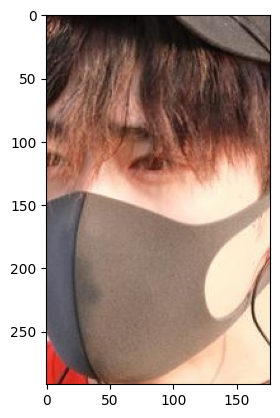

In [9]:
# displaying with mask image
img = mpimg.imread('dataset/with_mask/with_mask_1525.jpg')
imgplot = plt.imshow(img)
plt.show()


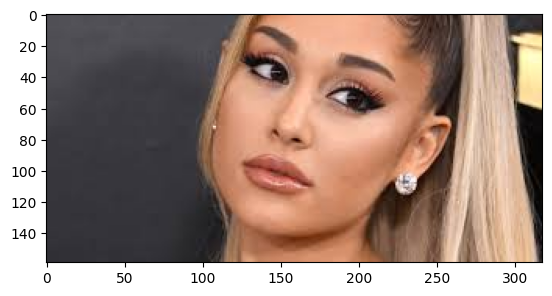

In [10]:
# displaying without mask image
img = mpimg.imread('dataset/without_mask/without_mask_2950.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [11]:
# convert images to numpy arrays+

with_mask_path = 'dataset/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = 'dataset/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [12]:
type(data)

list

In [13]:
len(data)

7553

In [14]:
data[0]

array([[[50, 58, 31],
        [46, 55, 33],
        [56, 58, 42],
        ...,
        [27, 32, 25],
        [29, 33, 19],
        [33, 40, 17]],

       [[47, 54, 30],
        [49, 58, 36],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [37, 42, 31],
        [31, 41, 23]],

       [[51, 58, 37],
        [50, 59, 37],
        [59, 64, 37],
        ...,
        [45, 44, 30],
        [29, 34, 27],
        [20, 30, 18]],

       ...,

       [[63, 73, 37],
        [66, 75, 41],
        [74, 84, 50],
        ...,
        [ 5,  3,  0],
        [20, 19, 14],
        [17, 16, 12]],

       [[58, 72, 34],
        [60, 70, 39],
        [68, 75, 49],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 30],
        [53, 64, 37],
        [57, 64, 42],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [19, 12, 13]]], dtype=uint8)

In [15]:
type(data[0])

numpy.ndarray

In [16]:
data[0].shape

(128, 128, 3)

In [17]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [18]:
type(X)

numpy.ndarray

In [19]:
type(Y)

numpy.ndarray

In [20]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [21]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)



In [23]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [24]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [25]:
X_train[0]

array([[[226, 234, 201],
        [211, 216, 188],
        [188, 188, 169],
        ...,
        [186, 181, 165],
        [179, 175, 150],
        [166, 181, 136]],

       [[224, 228, 218],
        [201, 204, 195],
        [201, 199, 192],
        ...,
        [197, 190, 182],
        [175, 170, 153],
        [162, 180, 143]],

       [[205, 204, 212],
        [221, 220, 226],
        [195, 192, 196],
        ...,
        [183, 174, 173],
        [172, 167, 159],
        [181, 199, 171]],

       ...,

       [[156, 176, 197],
        [159, 180, 196],
        [164, 185, 196],
        ...,
        [ 89,  99,  71],
        [106, 113,  83],
        [ 99, 103,  68]],

       [[151, 177, 196],
        [167, 190, 208],
        [174, 192, 210],
        ...,
        [106, 113,  80],
        [ 99, 104,  64],
        [ 98,  98,  41]],

       [[162, 192, 210],
        [177, 199, 220],
        [175, 189, 213],
        ...,
        [103, 107,  70],
        [ 79,  80,  46],
        [ 99,  94,  61]]

In [26]:
X_train_scaled[0]

array([[[0.88627451, 0.91764706, 0.78823529],
        [0.82745098, 0.84705882, 0.7372549 ],
        [0.7372549 , 0.7372549 , 0.6627451 ],
        ...,
        [0.72941176, 0.70980392, 0.64705882],
        [0.70196078, 0.68627451, 0.58823529],
        [0.65098039, 0.70980392, 0.53333333]],

       [[0.87843137, 0.89411765, 0.85490196],
        [0.78823529, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75294118],
        ...,
        [0.77254902, 0.74509804, 0.71372549],
        [0.68627451, 0.66666667, 0.6       ],
        [0.63529412, 0.70588235, 0.56078431]],

       [[0.80392157, 0.8       , 0.83137255],
        [0.86666667, 0.8627451 , 0.88627451],
        [0.76470588, 0.75294118, 0.76862745],
        ...,
        [0.71764706, 0.68235294, 0.67843137],
        [0.6745098 , 0.65490196, 0.62352941],
        [0.70980392, 0.78039216, 0.67058824]],

       ...,

       [[0.61176471, 0.69019608, 0.77254902],
        [0.62352941, 0.70588235, 0.76862745],
        [0.64313725, 0

**Building a Convolutional Neural Networks (CNN)**

In [27]:
import tensorflow as tf
from tensorflow import keras

num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [28]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [29]:

# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 189s 1s/step - loss: 0.4483 - acc: 0.8034 - val_loss: 0.2601 - val_acc: 0.8843
Epoch 2/5
170/170 [==============================] - 207s 1s/step - loss: 0.2895 - acc: 0.8871 - val_loss: 0.2197 - val_acc: 0.9240
Epoch 3/5
170/170 [==============================] - 170s 999ms/step - loss: 0.2484 - acc: 0.8992 - val_loss: 0.2459 - val_acc: 0.9256
Epoch 4/5
170/170 [==============================] - 188s 1s/step - loss: 0.2076 - acc: 0.9200 - val_loss: 0.2132 - val_acc: 0.9322
Epoch 5/5
170/170 [==============================] - 171s 1s/step - loss: 0.1766 - acc: 0.9270 - val_loss: 0.2183 - val_acc: 0.9372


**Model Evaluation**

In [30]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 14s 281ms/step - loss: 0.2297 - acc: 0.9179
Test Accuracy = 0.9179351329803467


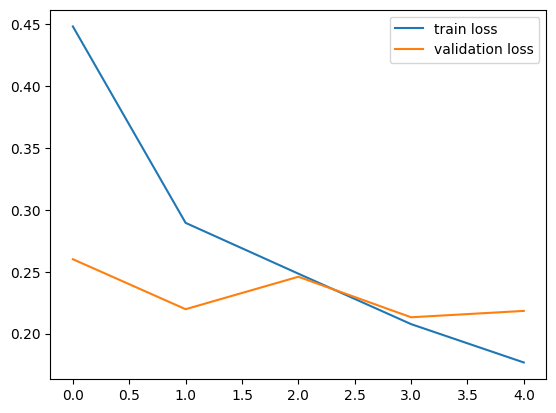

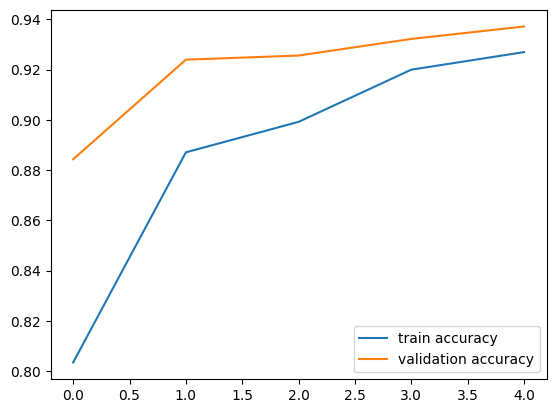

In [31]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Deployment**

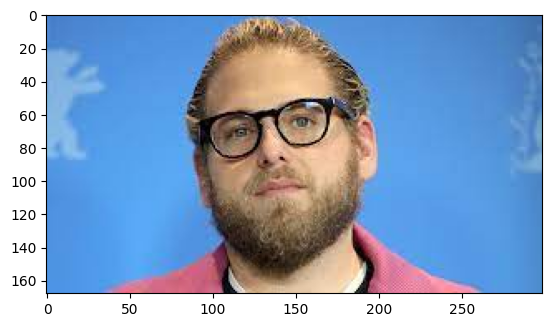

1/1 [==============================] - 0s 47ms/step
[[0.46239525 0.41793287]]
0
Person is not wearing Mask


In [44]:
input_image_path = input("Path of the image to be predicted: ")

# Read the image
input_image = cv2.imread(input_image_path)

# Display the original image
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.show()

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('Person is wearing Mask')

else:

  print('Person is not wearing Mask')

  # give the image path above for detection

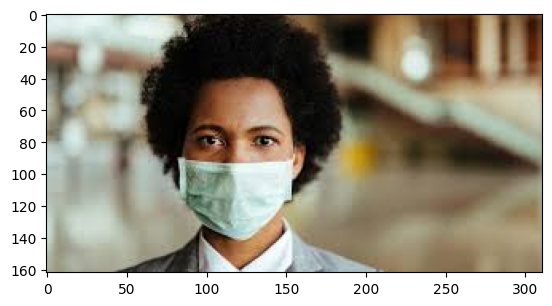

1/1 [==============================] - 0s 39ms/step
[[0.38813898 0.74654025]]
1
Person is wearing Mask


In [46]:
input_image_path = input("Path of the image to be predicted: ")

# Read the image
input_image = cv2.imread(input_image_path)

# Display the original image
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.show()

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('Person is wearing Mask')

else:

  print('Person is not wearing Mask')

  # give the image path above for detection